## Multi classification problem using pytorch
### Datasets from sklearn (wine)
#### Each wine has 13 features which are 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline' and can be classified into 3 types.

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import random
import torch
from torch import nn
import numpy as np
loaded_data = datasets.load_wine()
data_X = loaded_data.data
data_Y = loaded_data.target
print(loaded_data.feature_names,"\n",loaded_data.target_names)
data_X = torch.from_numpy(data_X)
data_Y = torch.from_numpy(data_Y)
data_Y = data_Y.type(torch.long)
#print(data_X)
print(data_X)
#print(train_data_X,"\n",test_data_X)
input_size = data_X.shape[1]
output_size = 3
print(data_Y.type)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'] 
 ['class_0' 'class_1' 'class_2']
tensor([[1.4230e+01, 1.7100e+00, 2.4300e+00,  ..., 1.0400e+00, 3.9200e+00,
         1.0650e+03],
        [1.3200e+01, 1.7800e+00, 2.1400e+00,  ..., 1.0500e+00, 3.4000e+00,
         1.0500e+03],
        [1.3160e+01, 2.3600e+00, 2.6700e+00,  ..., 1.0300e+00, 3.1700e+00,
         1.1850e+03],
        ...,
        [1.3270e+01, 4.2800e+00, 2.2600e+00,  ..., 5.9000e-01, 1.5600e+00,
         8.3500e+02],
        [1.3170e+01, 2.5900e+00, 2.3700e+00,  ..., 6.0000e-01, 1.6200e+00,
         8.4000e+02],
        [1.4130e+01, 4.1000e+00, 2.7400e+00,  ..., 6.1000e-01, 1.6000e+00,
         5.6000e+02]], dtype=torch.float64)
<built-in method type of Tensor object at 0x00000228FA24B3C0>


In [63]:
train_num = 120
index = random.sample(range(0,178), train_num)
a = list(range(0,178))
for i in index:
    a.remove(i)
print(index)
print(a)

[157, 164, 94, 98, 39, 171, 71, 126, 60, 176, 74, 161, 115, 102, 45, 89, 38, 51, 34, 79, 99, 167, 120, 18, 52, 4, 111, 172, 14, 105, 169, 50, 31, 165, 84, 9, 17, 143, 77, 19, 158, 156, 37, 55, 177, 103, 153, 58, 134, 43, 173, 125, 113, 5, 68, 59, 48, 148, 109, 91, 149, 150, 32, 8, 135, 128, 107, 76, 15, 1, 2, 53, 80, 7, 65, 104, 85, 13, 118, 28, 95, 83, 140, 29, 160, 27, 6, 47, 163, 151, 145, 0, 44, 114, 49, 129, 90, 66, 137, 23, 144, 61, 110, 106, 12, 147, 21, 139, 155, 40, 82, 168, 100, 117, 64, 166, 25, 138, 75, 22]
[3, 10, 11, 16, 20, 24, 26, 30, 33, 35, 36, 41, 42, 46, 54, 56, 57, 62, 63, 67, 69, 70, 72, 73, 78, 81, 86, 87, 88, 92, 93, 96, 97, 101, 108, 112, 116, 119, 121, 122, 123, 124, 127, 130, 131, 132, 133, 136, 141, 142, 146, 152, 154, 159, 162, 170, 174, 175]


#### torch.index_select can select special index contant in a torch tensor

In [64]:
train_data_X = torch.index_select(data_X, 0, torch.tensor(index))
train_data_Y = torch.index_select(data_Y, 0, torch.tensor(index))
test_data_X = torch.index_select(data_X, 0, torch.tensor(a))
test_data_Y = torch.index_select(data_Y, 0, torch.tensor(a))
print(train_data_X.shape,train_data_Y.shape,test_data_X.shape,test_data_Y.shape)
print(train_data_Y)

torch.Size([120, 13]) torch.Size([120]) torch.Size([58, 13]) torch.Size([58])
tensor([2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 2, 1, 1, 0, 1, 0, 0, 0, 1, 1, 2, 1, 0,
        0, 0, 1, 2, 0, 1, 2, 0, 0, 2, 1, 0, 0, 2, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0,
        2, 0, 2, 1, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0,
        1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 0, 1,
        1, 1, 2, 0, 2, 1, 1, 1, 0, 2, 0, 2, 2, 0, 1, 2, 1, 1, 1, 2, 0, 2, 1, 0])


In [65]:
# inherit nn.Module
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.layer1 = nn.Linear(13,10)
        self.layer2 = nn.Linear(10,3)
    def forward(self,x):
        y = self.layer1(x)
        y = self.layer2(y)
        return y

In [89]:
net = Net()
net.double()
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.001)

In [90]:
#train
net.double()
def train():
    train_l = 0.0
    y_hat = net(train_data_X)
    l = loss(y_hat, train_data_Y).sum()
    
    optimizer.zero_grad()

    l.backward()

    optimizer.step()
    train_l = l
    print('epoch %d, loss %.4f' % (epoch + 1, train_l))
    return train_l

In [91]:
#test
def test():
    correct = 0
    total = 0
    for data in test_data_X:
        test = net(data)
        _, predict = torch.max(test.data, dim=0)
        #print(predict.item(), test_data_Y[total].item())
        if(predict.item() == test_data_Y[total].item()): 
            correct+=1
        total +=1
    print("correct rate = ",100 * correct/total)
    return 100 * correct/total *0.01

epoch 1, loss 0.6273
correct rate =  67.24137931034483
epoch 2, loss 0.6268
correct rate =  67.24137931034483
epoch 3, loss 0.6263
correct rate =  67.24137931034483
epoch 4, loss 0.6258
correct rate =  67.24137931034483
epoch 5, loss 0.6253
correct rate =  67.24137931034483
epoch 6, loss 0.6248
correct rate =  67.24137931034483
epoch 7, loss 0.6243
correct rate =  67.24137931034483
epoch 8, loss 0.6238
correct rate =  67.24137931034483
epoch 9, loss 0.6234
correct rate =  67.24137931034483
epoch 10, loss 0.6229
correct rate =  67.24137931034483
epoch 11, loss 0.6224
correct rate =  67.24137931034483
epoch 12, loss 0.6220
correct rate =  67.24137931034483
epoch 13, loss 0.6215
correct rate =  67.24137931034483
epoch 14, loss 0.6210
correct rate =  67.24137931034483
epoch 15, loss 0.6206
correct rate =  67.24137931034483
epoch 16, loss 0.6201
correct rate =  67.24137931034483
epoch 17, loss 0.6197
correct rate =  67.24137931034483
epoch 18, loss 0.6192
correct rate =  67.24137931034483
e

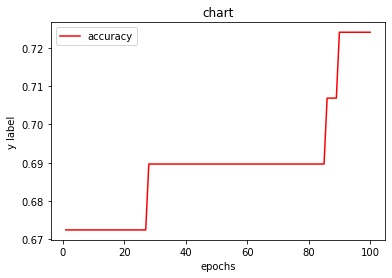

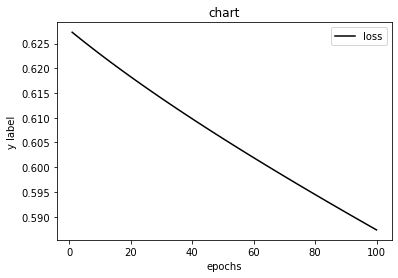

In [93]:
lss = []
acc = []
epochs = []
for epoch in range(100):
    epochs.append(epoch+1)
    ls = train();
    ac = test();
    l_tmp = ls.detach().numpy()
    lss.append(l_tmp)
    acc.append(ac);
    
plt.plot(epochs,acc,color='r',label='accuracy')  
plt.xlabel('epochs')    
plt.ylabel('y label')   
plt.title("chart")      
plt.legend()   
plt.show()

plt.plot(epochs,lss,color=(0,0,0),label='loss')
plt.xlabel('epochs')    
plt.ylabel('y label')   
plt.title("chart")      
plt.legend()            
plt.show()